<a href="https://colab.research.google.com/github/ValentinaQuinteroC/Challenge_TELECOMX1/blob/main/Challenge_TELECOMX1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Extracción

In [4]:
import pandas as pd

In [5]:
datos = pd.read_json('TelecomX_Data.json')

In [6]:
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# 🔧 Transformación

In [7]:
customer_df = pd.json_normalize(datos['customer'])
customer_df

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [8]:
phone_df = pd.json_normalize(datos['phone'])
phone_df

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [9]:
internet_df = pd.json_normalize(datos['internet'])
internet_df

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [10]:
account_df = pd.json_normalize(datos['account'])
account_df

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [11]:
datos_completos = pd.concat([datos, customer_df, phone_df, internet_df, account_df], axis=1)
datos_completos

,customerID,Churn,customer,phone,internet,account,gender,SeniorCitizen,Partner,Dependents,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,Yes,Yes,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,1,Yes,No,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Female,1,Yes,No,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '...",Female,0,No,No,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,Yes,No,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli...",Male,0,No,No,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '...",Male,0,Yes,Yes,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [12]:
datos_completos = datos_completos.drop(columns = ['customer', 'phone', 'internet', 'account'])
datos_completos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [13]:
datos_completos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [14]:
import numpy as np

In [15]:
datos_limpios = datos_completos.replace('', np.nan)
datos_limpios['Charges.Total'].isna().sum()

np.int64(0)

In [16]:
(datos_limpios['Charges.Total'] == ' ').sum()

np.int64(11)

In [17]:
datos_limpios['Charges.Total'] = pd.to_numeric(datos_limpios['Charges.Total'], errors='coerce')

In [18]:
datos_limpios['Charges.Total']= datos_limpios['Charges.Total'].astype(np.float64)

In [19]:
datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [20]:
datos_limpios.isnull().sum()

,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [21]:
datos_limpios['Churn'].unique()

array(['No', 'Yes', nan], dtype=object)

In [22]:
datos_limpios['customerID'].duplicated().sum()

np.int64(0)

In [23]:
columnas_binarias = ['Churn', 'Partner','Dependents', 'PhoneService','PaperlessBilling']

In [24]:
for col in columnas_binarias:
    datos_limpios[col] = (
        datos_limpios[col]
        .str.strip()
        .str.lower()
        .map({'yes': 1, 'no': 0})
        .astype('Int64')
    )

In [25]:
otras_opciones = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies', 'StreamingTV']

In [26]:
for col in otras_opciones:
    datos_limpios[col] = (
        datos_limpios[col]
        .str.strip()
        .str.lower()
        .apply(lambda x: 1 if x == 'yes' else 0)
    )

In [27]:
pd.set_option('display.max_columns', None)

In [28]:
datos_limpios['Cuentas diarias'] = datos_limpios['Charges.Monthly'] / 30

In [29]:
datos_limpios = datos_limpios.rename(columns={'customerID': 'Identificacion del usuario', 'Churn': 'Abandonó', 'gender': 'Género', 'SeniorCitizen' : 'Adulto mayor',
                                              'Partner':'Pareja', 'Dependents':'Dependientes', 'tenure':'Meses de contrato', 'PhoneService': 'Servicio telefónico',
                                              'MultipleLines': 'Lineas múltiples', 'InternetService':'Servicio de internet', 'OnlineSecurity': 'Seguridad en línea', 'OnlineBackup':'Respaldo en línea',
                                              'DeviceProtection':'Protección del dispositivo', 'TechSupport': 'Soporte técnico', 'StreamingMovies': 'Películas de Streaming', 'Contract': 'Contrato',
                                              'PaperlessBilling': 'Factura electrónica', 'PaymentMethod': 'Método de pago', 'Charges.Monthly': 'Cuentas mensuales', 'Charges.Total': 'Cuenta total'})

In [30]:
datos_limpios

,Identificacion del usuario,Abandonó,Género,Adulto mayor,Pareja,Dependientes,Meses de contrato,Servicio telefónico,Lineas múltiples,Servicio de internet,Seguridad en línea,Respaldo en línea,Protección del dispositivo,Soporte técnico,StreamingTV,Películas de Streaming,Contrato,Factura electrónica,Método de pago,Cuentas mensuales,Cuenta total,Cuentas diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,1,0,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,1,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.261667


In [31]:
datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Identificacion del usuario  7267 non-null   object 
 1   Abandonó                    7043 non-null   Int64  
 2   Género                      7267 non-null   object 
 3   Adulto mayor                7267 non-null   int64  
 4   Pareja                      7267 non-null   Int64  
 5   Dependientes                7267 non-null   Int64  
 6   Meses de contrato           7267 non-null   int64  
 7   Servicio telefónico         7267 non-null   Int64  
 8   Lineas múltiples            7267 non-null   int64  
 9   Servicio de internet        7267 non-null   object 
 10  Seguridad en línea          7267 non-null   int64  
 11  Respaldo en línea           7267 non-null   int64  
 12  Protección del dispositivo  7267 non-null   int64  
 13  Soporte técnico             7267 

# 📊 Carga y análisis

In [32]:
datos_limpios.describe()

,Abandonó,Adulto mayor,Pareja,Dependientes,Meses de contrato,Servicio telefónico,Lineas múltiples,Seguridad en línea,Respaldo en línea,Protección del dispositivo,Soporte técnico,StreamingTV,Películas de Streaming,Factura electrónica,Cuentas mensuales,Cuenta total,Cuentas diarias
count,7043.0,7267.000000,7267.0,7267.0,7267.000000,7267.0,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.0,7267.000000,7256.000000,7267.000000
mean,0.26537,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.59323,64.720098,2280.634213,2.157337
std,0.441561,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.632997,1.004319
min,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,18.250000,18.800000,0.608333
25%,0.0,0.000000,0.0,0.0,9.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,35.425000,400.225000,1.180833
50%,0.0,0.000000,0.0,0.0,29.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,70.300000,1391.000000,2.343333
75%,1.0,0.000000,1.0,1.0,55.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,89.875000,3785.300000,2.995833
max,1.0,1.000000,1.0,1.0,72.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,118.750000,8684.800000,3.958333


In [33]:
datos_limpios.groupby('Abandonó').describe()

Adulto mayor                                               Pareja  \
                count      mean       std  min  25%  50%  75%  max   count   
Abandonó                                                                     
0              5174.0  0.128721  0.334923  0.0  0.0  0.0  0.0  1.0  5174.0   
1              1869.0  0.254682  0.435799  0.0  0.0  0.0  1.0  1.0  1869.0   

                                                      Dependientes            \
              mean       std  min  25%  50%  75%  max        count      mean   
Abandonó                                                                       
0         0.528218  0.499251  0.0  0.0  1.0  1.0  1.0       5174.0  0.344801   
1         0.357945  0.479524  0.0  0.0  0.0  1.0  1.0       1869.0  0.174425   

                                            Meses de contrato             \
               std  min  25%  50%  75%  max             count       mean   
Abandonó                                                                   
0         0.475349  0.0  0.0  0.0  1.0  1.0            5174.0  37.569965   
1         0.379576  0.0  0.0  0.0  0.0  1.0            1869.0  17.979133   

                                                 Servicio telefónico  \
                std  min   25%   50%   75%   max               count   
Abandonó                                                               
0         24.113777  0.0  15.0  38.0  61.0  72.0              5174.0   
1         19.531123  1.0   2.0  10.0  29.0  72.0              1869.0   

                                                      Lineas múltiples  \
              mean       std  min  25%  50%  75%  max            count   
Abandonó                                                                 
0         0.901044  0.298632  0.0  1.0  1.0  1.0  1.0           5174.0   
1         0.909042  0.287626  0.0  1.0  1.0  1.0  1.0           1869.0   

                                                      Seguridad en línea  \
              mean       std  min  25%  50%  75%  max              count   
Abandonó                                                                   
0         0.409934  0.491869  0.0  0.0  0.0  1.0  1.0             5174.0   
1         0.454789  0.498085  0.0  0.0  0.0  1.0  1.0             1869.0   

                                                      Respaldo en línea  \
              mean       std  min  25%  50%  75%  max             count   
Abandonó                                                                  
0         0.333204  0.471405  0.0  0.0  0.0  1.0  1.0            5174.0   
1         0.157838  0.364687  0.0  0.0  0.0  0.0  1.0            1869.0   

                                                       \
              mean       std  min  25%  50%  75%  max   
Abandonó                                                
0         0.368380  0.482412  0.0  0.0  0.0  1.0  1.0   
1         0.279829  0.449035  0.0  0.0  0.0  1.0  1.0   

         Protección del dispositivo                                          \
                              count      mean       std  min  25%  50%  75%   
Abandonó                                                                      
0                            5174.0  0.362775  0.480847  0.0  0.0  0.0  1.0   
1                            1869.0  0.291600  0.454621  0.0  0.0  0.0  1.0   

              Soporte técnico                                               \
          max           count      mean       std  min  25%  50%  75%  max   
Abandonó                                                                     
0         1.0          5174.0  0.335137  0.472084  0.0  0.0  0.0  1.0  1.0   
1         1.0          1869.0  0.165864  0.372058  0.0  0.0  0.0  0.0  1.0   

         StreamingTV                                               \
               count      mean       std  min  25%  50%  75%  max   
Abandonó                                                            
0             5174.0  0.365868  0.481719  0.0  0.0  0.0  1.0  1.0  

In [34]:
suma = datos_limpios['Abandonó'].value_counts()
suma

,count
Abandonó,
0,5174
1,1869


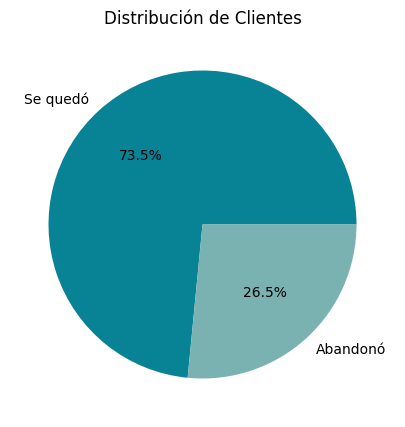

In [35]:
import matplotlib.pyplot as plt
labels = ['Se quedó', 'Abandonó']
colors=['#088395','#7AB2B2']

plt.figure(figsize=(10,5))
plt.pie(
    suma,
    labels =labels,
    colors= colors,
    autopct='%1.1f%%'
)
plt.title('Distribución de Clientes')
plt.show()

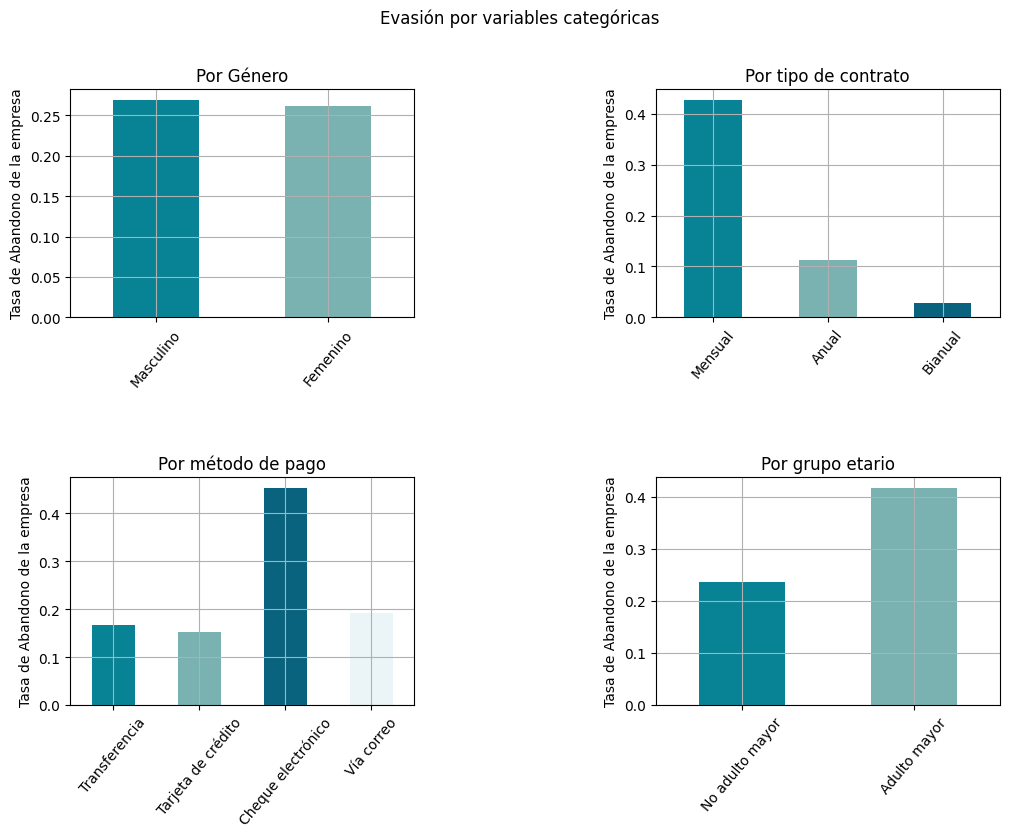

In [36]:
palette = ['#088395', '#7AB2B2', '#09637E', '#EBF4F6']
fig, axs = plt.subplots(2,2, figsize=(12,8))
fig.subplots_adjust(hspace=0.7, wspace=0.7)
fig.suptitle('Evasión por variables categóricas')

datos_limpios.groupby('Género')['Abandonó'].mean().plot(kind='bar', ax=axs[0,0], color=palette[:2])
axs[0,0].set_title('Por Género')
axs[0,0].set_xticklabels(['Masculino', 'Femenino'], rotation=50)

datos_limpios.groupby('Contrato')['Abandonó'].mean().plot(kind='bar', ax=axs[0,1], color=palette[:3])
axs[0,1].set_title('Por tipo de contrato')
axs[0,1].set_xticklabels(['Mensual', 'Anual', 'Bianual'], rotation=50)

datos_limpios.groupby('Método de pago')['Abandonó'].mean().plot(kind='bar', ax=axs[1,0], color=palette)
axs[1,0].set_title('Por método de pago')
axs[1,0].set_xticklabels(['Transferencia', 'Tarjeta de crédito', 'Cheque electrónico', 'Vía correo'], rotation=50)

datos_limpios.groupby('Adulto mayor')['Abandonó'].mean().plot(kind='bar', ax=axs[1,1], color=palette[:2])
axs[1,1].set_title('Por grupo etario'),
axs[1,1].set_xticklabels(['No adulto mayor', 'Adulto mayor'], rotation=50)

for ax in axs.flat:
    ax.set_ylabel('Tasa de Abandono de la empresa')
    ax.set_xlabel('')
    ax.grid()


plt.show()

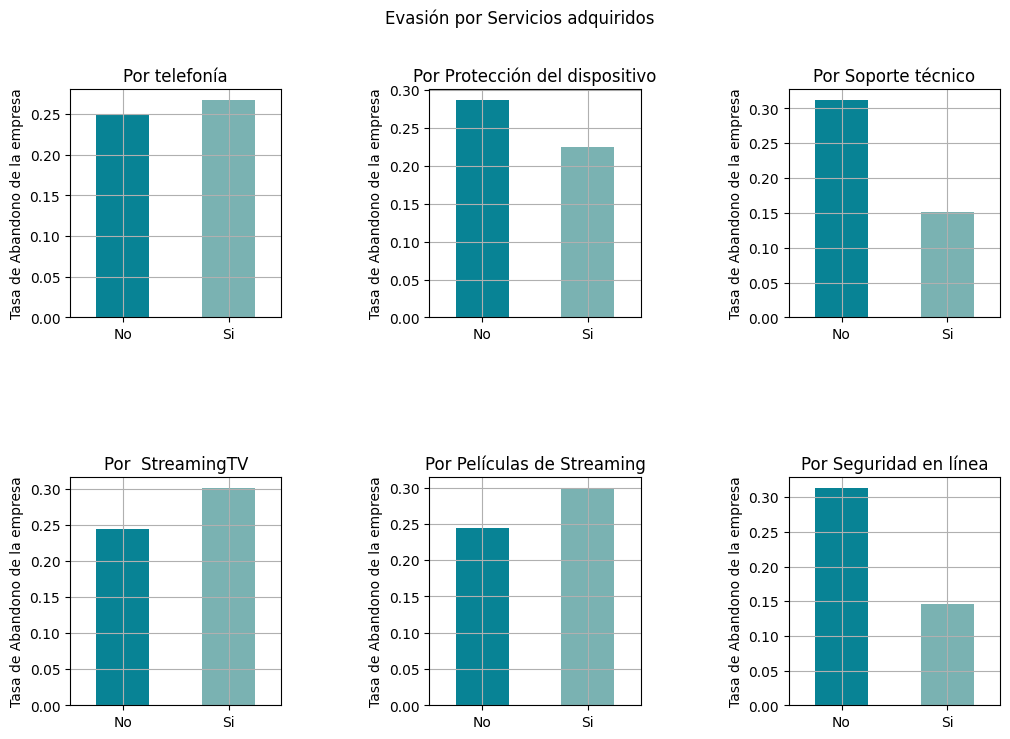

In [37]:
palette = ['#088395', '#7AB2B2', '#09637E', '#EBF4F6']
fig, axs = plt.subplots(2,3, figsize=(12,8))
fig.subplots_adjust(hspace=0.7, wspace=0.7)
fig.suptitle('Evasión por Servicios adquiridos')

datos_limpios.groupby('Servicio telefónico')['Abandonó'].mean().plot(kind='bar', ax=axs[0,0], color=palette[:2])
axs[0,0].set_title('Por telefonía')
axs[0,0].set_xticklabels(['No', 'Si'], rotation=0)

datos_limpios.groupby('Protección del dispositivo')['Abandonó'].mean().plot(kind='bar', ax=axs[0,1], color=palette[:2])
axs[0,1].set_title('Por Protección del dispositivo')
axs[0,1].set_xticklabels(['No', 'Si'], rotation=0)

datos_limpios.groupby('Soporte técnico')['Abandonó'].mean().plot(kind='bar', ax=axs[0,2], color=palette)
axs[0,2].set_title('Por Soporte técnico')
axs[0,2].set_xticklabels(['No', 'Si'], rotation=0)

datos_limpios.groupby('StreamingTV')['Abandonó'].mean().plot(kind='bar', ax=axs[1,0], color=palette[:2])
axs[1,0].set_title('Por  StreamingTV'),
axs[1,0].set_xticklabels(['No', 'Si'], rotation=0)

datos_limpios.groupby('Películas de Streaming')['Abandonó'].mean().plot(kind='bar', ax=axs[1,1], color=palette[:2])
axs[1,1].set_title('Por Películas de Streaming'),
axs[1,1].set_xticklabels(['No', 'Si'], rotation=0)

datos_limpios.groupby('Seguridad en línea')['Abandonó'].mean().plot(kind='bar', ax=axs[1,2], color=palette[:2])
axs[1,2].set_title('Por Seguridad en línea'),
axs[1,2].set_xticklabels(['No', 'Si'], rotation=0)

for ax in axs.flat:
    ax.set_ylabel('Tasa de Abandono de la empresa')
    ax.set_xlabel('')
    ax.grid()


plt.show()

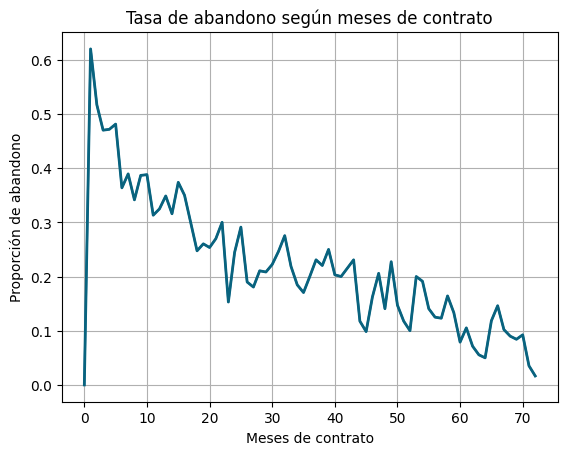

In [38]:
tasa_por_mes = datos_limpios.groupby('Meses de contrato')['Abandonó'].mean()

plt.figure()
tasa_por_mes.plot()
plt.title('Tasa de abandono según meses de contrato')
plt.xlabel('Meses de contrato')
plt.ylabel('Proporción de abandono')
tasa_por_mes.plot(color='#09637E', linewidth=2)
plt.grid()
plt.show()

<Figure size 640x480 with 0 Axes>

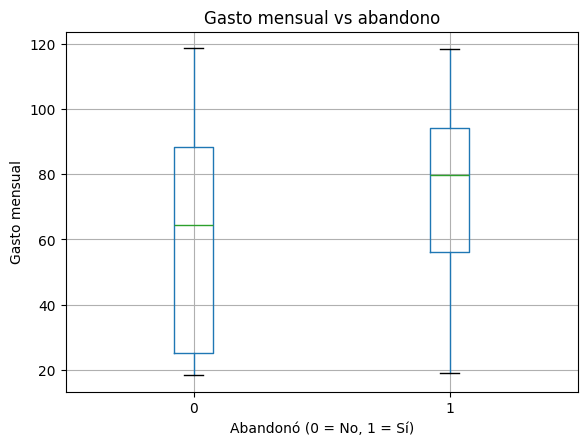

In [39]:
plt.figure()
datos_limpios.boxplot(
    column='Cuentas mensuales',
    by='Abandonó'
)

plt.title('Gasto mensual vs abandono')
plt.suptitle('')
plt.xlabel('Abandonó (0 = No, 1 = Sí)')
plt.ylabel('Gasto mensual')
plt.show()

<Figure size 640x480 with 0 Axes>

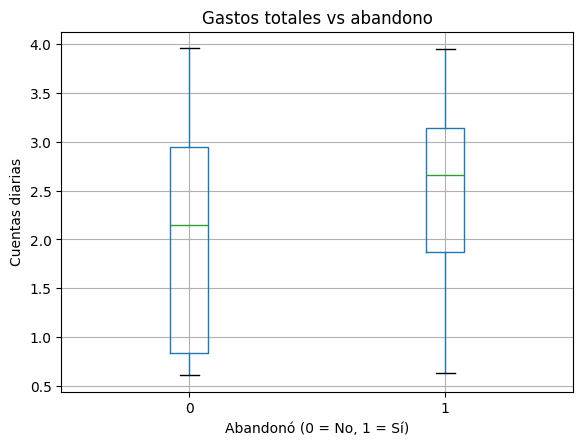

In [40]:
plt.figure()
datos_limpios.boxplot(
    column='Cuentas diarias',
    by='Abandonó'
)

plt.title('Gastos totales vs abandono')
plt.suptitle('')
plt.xlabel('Abandonó (0 = No, 1 = Sí)')
plt.ylabel('Cuentas diarias')
plt.show()

# 📄Informe final

🔹 Introducción:

Nos encontramos trabajando para una empresa llamada Telecom X que enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Nos fue proporcionada una base de datos completa con la información de los clientes, mediante la cual se realizó un estudio profundo del perfil y posibles barreras comerciales que llevan a los clientes a preferir la competencia; el cual, se explicara a continuacion por medio de gráficos que facilitarán su comprensión.

🔹 Limpieza y Tratamiento de Datos:

Por medio del lenguaje Python, se accedió a librerias como pandas, numphy y matplotlib, que permitieron el tratamiento, analisis y visualizacion de datos.

En primer lugar, se accedió a la base de datos mediante la descarga del archivo JSON, y permitiendo su disponibilidad en google colab con el fin de utilizar esta herramienta para los procesos de codificación.

Una vez importados, se abre el archivo para su exploración, encontrando que se trata de una base con múltiples diccionarios, los cuales se procede a 'abrir', generando posteriormente un único dataframe que contiene todas estas columnas unidas, para permitir el entendimiento e identificación de los tipos de datos con los que estamos trabajando, y el requerimiento de ajustes de los mismos.

Para asegurarnos de trabajar con datos limpios y confiables, se descarta la existencia de usuarios duplicados y espacios vacíos, los cuales son posteriormente reemplazados por valores que permitirán  un análisis matemático, teniendo en cuenta únicamente los valores positivos que tendran peso a la hora del analisis

Por otro lado, las columnas con valores binarios: SI/NO, se convierten a 1/0 para faciliar su manipulacion durante la generación y análisis de resultados. Asi mismo, las columnas con datos de SI/NO/'NO TIENE', son reemplazados por SI/NO.

Por ultimo, antes de proceder al análisis, realizamos el cambio de nombre de las columnas, para faciliar la interpretacion de resultados una vez estos sean entregados al cliente.

🔹 Análisis Exploratorio de Datos:
Para el inicio del analisis de los datos, se procedio en un primer instante al uso del metodo describe(), el cual nos permite un primer entendiemiento de medidas basicas como promedio, conteo total, media, mediana, etc... sin embargo, nuestra atencion va dirigida principalmente al Churn o permanencia de los clientes en la empresa, considerando diferentes variables.

En primer lugar, se estimó el total de clientes que permanece, y el total de clientes que abandonó los servicios, lo cual se ve reflejado en la gráfica de torta. Una vez entendida esta proporcion, nos permitimos estudiar los factores que llevaron al valor de esa variable, estudiando entonces la misma con variables categóricas, numéricas y de servicios mediante el uso de gráficas de barras, líneas y boxplots.



🔹 Conclusiones e Insights

*   Variables categóricas: identificadas mediante 4 gráficas de barras, evidenciamos que en cuanto al género, se evidencia una mayor proporción de abandono en hombres que en mujeres, sin embargo, no de una manera significativa. Por otro lado, encontramos una diferencia importante en cuanto al tipo de contrato, donde se evidencia que la mayor cantidad de clientes en abandono, son aquellos con contrato mensual. Adicionalmente, en cuanto al método de pago, se evidencia un valor significativo de abandono mediante el uso del cheque electrónico. Y, finalmente, en cuanto a grupos étnicos, se evidencia que los usuarios de la empresa no tienden a dominar la edad mayor, sin embargo, en una tasa de proporción, se evidencia que es éste grupo precisamente, quienes presentan mas abandono.

*   Variables de servicios: representados mediante 6 gráficas de barras, se evidencia una tendencia al abandono en clientes sin soporte técnico, sin protección del dispositivo y sin seguridad en línea, evidenciando que los clientes dan mas valor de peso a la seguridad, antes que a las opciones de entretenimiento.

*  Variables numéricas: por medio de una gráfica de líneas, se pudo evidenciar que la tasa de abandono es considerablemente mayor durante los primeros meses de contrato, que en aquellos con una mayor durabilidad. Por otro lado, Es de gran preocupación que se evidencia que los clientes que tienen una mediana de gasto mensual más alta, son aquellos que abandonan, lo cual también se evidencia en el Boxplot de cuentas diarias.


🔹 Recomendaciones:

En cuanto a las variables previamente descritas, se evidencia un perfil muy definido de clientes que abandondan durante los primeros meses, que probablemente tienen dificultades con el pago mediante el uso de cheque online, especialmente en adultos mayores, y que probablemente encuentran precios competitivos en otras empresas que ofrecen servicios de su interes, en la mayoria de casos, ofreciendo algun tipo de soporte o seguridad.

por lo anterior, se sugiere en primer lugar, intentar realizar seguimiento a los clientes nuevos, conocer su exteriencia durante los primeros meses e incentivar su fidelizacion durante un periodo anual mediante el ofrecimiento precios competitivos y ofertas en servicios complementarios de seguridad. Tambien se recomienda evaluar dificultades en la plataforma de pago mediante cheque electrónico, asi como un estudio poblacional, ya que en adultos mayores este tipo de pagos, puede tener una dificultad adicional.

en conclusion, se busca mejorar la experiencia del cliente en los primeros meses para asegurar su perdurabilidad en la empresa. tambien se pueden ofrecer incentivos ocasionales por durabilidad, de acuerdo a las preferencias del cliente.

In [41]:
datos_limpios.to_json('challengeTelecomX1.json')